## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Reading Data

In [2]:
data=pd.read_csv('diabetes.csv')

#### The first five rows of the dataset is displayed below

In [4]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12      

In [6]:
data.shape

(768, 9)

## Data Preprocessing:
##### A technique that is used to convert the raw data into a clean data set.

#### Checking for null values

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking for categorical values

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Feature Selection

In [9]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [10]:
data.drop(['BloodPressure','SkinThickness'],axis=1,inplace=True)

In [11]:
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


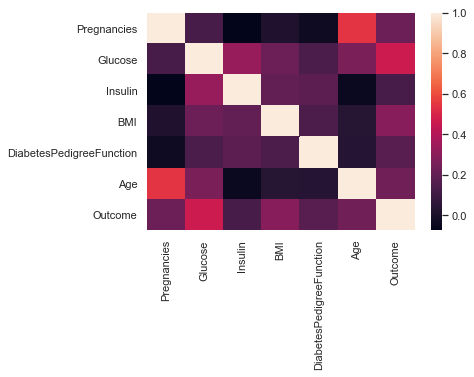

In [12]:
sns.heatmap(data.corr())

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

In [14]:
ft_cols=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

In [15]:
X=data[ft_cols]
Y=data['Outcome']

In [16]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


#### Splitting of train-set and test-set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

# Logistic Regression


#### Model Building

In [57]:
from sklearn import linear_model

model = linear_model.LogisticRegression(multi_class='auto')

In [58]:
model.fit(X_train,Y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

In [59]:
train_accuracy = model.score(X_train, Y_train)
print('Train-set accuracy from Logistic Regression \t: ', train_accuracy)

test_accuracy = model.score(X_test, Y_test)
print('Test-set accuracy from Logistic Reression \t: ', test_accuracy)

Train-set accuracy from Logistic Regression 	:  0.7630434782608696
Test-set accuracy from Logistic Reression 	:  0.7922077922077922


# Decision Tree


#### Model Building

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=20)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model Evaluation

In [61]:
train_accuracy = model.score(X_train, Y_train)
print('Train-set accuracy from Decision Tree Classifier \t: ', train_accuracy)

test_accuracy = model.score(X_test, Y_test)
print('Test-set accuracy from Decision Tree Clasifier \t: ', test_accuracy)

Train-set accuracy from Decision Tree Classifier 	:  0.8
Test-set accuracy from Decision Tree Clasifier 	:  0.7435064935064936


# Random Forest

#### Model Building

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, min_samples_leaf=30)

In [63]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Model Evaluation

In [64]:
train_accuracy = model.score(X_train, Y_train)
print('Train-set accuracy from Random Forest Classifier \t: ', train_accuracy)

test_accuracy = model.score(X_test, Y_test)
print('Test-set accuracy from Random Forest Clasifier \t: ', test_accuracy)

Train-set accuracy from Random Forest Classifier 	:  0.7913043478260869
Test-set accuracy from Random Forest Clasifier 	:  0.775974025974026
